Nama   : Hilmi Furqon
Nim    : 221011402145
Kelas  : 04TPLE013
Matkul : Data Mining
Dosen  : AGUNG PERDANANTO S.Kom, M.Kom

# import library yang di butukan

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

# membaca dataset

In [2]:
df = pd.read_csv('Mall_Customers.csv')

In [3]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


# persiapan dataset

In [4]:
df.rename(index=str, columns={'Annual Income (k$)' : 'Income',
                              'Spending Score (1-100)' : 'Score'
                              }, inplace=True)

In [5]:
x = df.drop(['CustomerID', 'Gender'], axis=1)

In [6]:
print(x)

     Age  Income  Score
0     19      15     39
1     21      15     81
2     20      16      6
3     23      16     77
4     31      17     40
..   ...     ...    ...
195   35     120     79
196   45     126     28
197   32     126     74
198   32     137     18
199   30     137     83

[200 rows x 3 columns]


# menentukan jumlah cluster dengan elbow

c:\Users\bagus\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\bagus\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\bagus\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\bagus\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environme

Text(5, 150000, 'Possible elbow point')

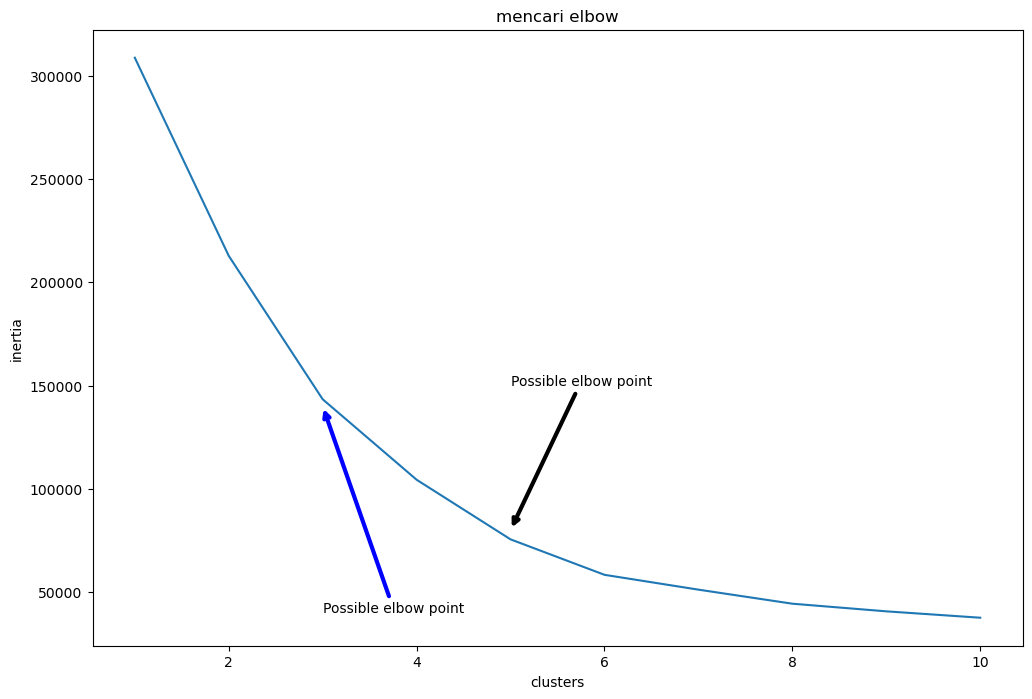

In [7]:
clusters=[]
for i in range(1,11):
    km =KMeans(n_clusters=i).fit(x)
    clusters.append(km.inertia_)

fig, ax = plt.subplots(figsize=(12,8))
sns.lineplot(x=list(range(1,11)), y=clusters, ax=ax)
ax.set_title('mencari elbow')
ax.set_xlabel('clusters')
ax.set_ylabel('inertia')

#panah elbow
ax.annotate('Possible elbow point', xy=(3, 140000), xytext=(3, 40000), xycoords='data',
            arrowprops=dict(arrowstyle='->', connectionstyle='arc3', color='blue', lw=3))
ax.annotate('Possible elbow point', xy=(5, 80000), xytext=(5, 150000), xycoords='data',
            arrowprops=dict(arrowstyle='->', connectionstyle='arc3', color='black', lw=3))

# proses clustering

In [8]:
n_clust = 4
kmean = KMeans(n_clusters=n_clust).fit(x)
x['labels'] = kmean.labels_

c:\Users\bagus\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\bagus\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


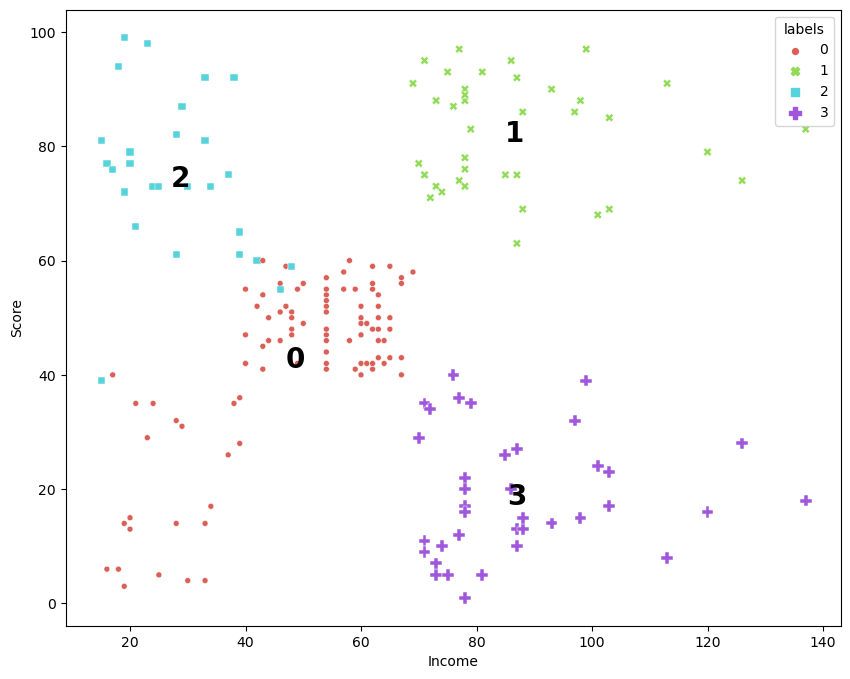

In [9]:
plt.figure(figsize=(10, 8))
sns.scatterplot(x='Income', y='Score', hue='labels', style='labels', size='labels', palette=sns.color_palette('hls', n_clust), data=x)

for label in x['labels'].unique():
    plt.annotate(label,
                 (x[x['labels'] == label]['Income'].mean(),
                  x[x['labels'] == label]['Score'].mean()),
                 horizontalalignment='center',
                 verticalalignment='center',
                 size=20, weight='bold',
                 color='black')

plt.show()

In [10]:
print(x)

     Age  Income  Score  labels
0     19      15     39       2
1     21      15     81       2
2     20      16      6       0
3     23      16     77       2
4     31      17     40       0
..   ...     ...    ...     ...
195   35     120     79       1
196   45     126     28       3
197   32     126     74       1
198   32     137     18       3
199   30     137     83       1

[200 rows x 4 columns]


In [11]:
x.to_excel('output_cluster.xlsx')